# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
from IPython.display import display
data= pd.read_csv('/datasets/real_estate_data.csv','\t')
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В таблице data мы видим несколько столбцов данных с пропущенными значениями. А также видно, что 
у некоторых данных придется изменить тип (к примеру, привести к int floor,parks_around3000 и др.)
В столбце first_day_exposition нужно будет привести данные к удобному формату.

## Предобработка данных

Заполним пропуски там, где это возможно

In [4]:
data.isna().mean()
 

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Заполним пропуски в столбце ceiling_height, используя среднее и сгруппировав данные по кол-ву комнат. Перед этим удалим строки с подозрительно большими значениями

In [5]:
data.loc[data['ceiling_height'] > 4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 154 to 22938
Data columns (total 22 columns):
total_images            75 non-null int64
last_price              75 non-null float64
total_area              75 non-null float64
first_day_exposition    75 non-null object
rooms                   75 non-null int64
ceiling_height          75 non-null float64
floors_total            75 non-null float64
living_area             69 non-null float64
floor                   75 non-null int64
is_apartment            21 non-null object
studio                  75 non-null bool
open_plan               75 non-null bool
kitchen_area            62 non-null float64
balcony                 42 non-null float64
locality_name           75 non-null object
airports_nearest        58 non-null float64
cityCenters_nearest     61 non-null float64
parks_around3000        61 non-null float64
parks_nearest           37 non-null float64
ponds_around3000        61 non-null float64
ponds_nearest           38 

In [6]:
data=data.drop(data.loc[data['ceiling_height'] > 4]. index)
data.loc[data['ceiling_height'] > 4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 22 columns):
total_images            0 non-null int64
last_price              0 non-null float64
total_area              0 non-null float64
first_day_exposition    0 non-null object
rooms                   0 non-null int64
ceiling_height          0 non-null float64
floors_total            0 non-null float64
living_area             0 non-null float64
floor                   0 non-null int64
is_apartment            0 non-null object
studio                  0 non-null bool
open_plan               0 non-null bool
kitchen_area            0 non-null float64
balcony                 0 non-null float64
locality_name           0 non-null object
airports_nearest        0 non-null float64
cityCenters_nearest     0 non-null float64
parks_around3000        0 non-null float64
parks_nearest           0 non-null float64
ponds_around3000        0 non-null float64
ponds_nearest           0 non-null float64
days_exposition    

In [7]:
grp_rooms= data.groupby(['rooms'])
data['ceiling_height']= grp_rooms.ceiling_height.apply(lambda x: x.fillna(x.mean()))

Заполнить пропуски в floors_total мы не сможем,т.к. не можем угадать сколько всего этажей в доме. Заполним пропуски просто нулями.

In [8]:
data['floors_total'] = data['floors_total'].fillna('0') 

Для заполнения пропусков в living_area опять же сгруппируем данные по кол-ву комнат

In [9]:
data['rooms'].value_counts()

1     8031
2     7920
3     5793
4     1176
5      319
0      195
6      102
7       57
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [10]:
display(data.loc[data['rooms'] > 10])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7,138.8,7,NaN,...,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5,129.0,2,NaN,...,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4,180.0,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
20829,6,28659000.0,245.4,2016-03-31T00:00:00,14,3.16,4,168.3,2,NaN,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


Из таблицы видим, что есть 8 квартир с количеством комнат больше 7. Скорее всего это коммунальные квартиры.
Но даже в этом случае кол-во комнат более 12 маловероятно. Удалим данные о квартирах с кол-вом комнат более 12.

In [11]:
data=data.drop(data.loc[data['rooms'] > 12]. index)
data.loc[data['rooms'] > 12].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 22 columns):
total_images            0 non-null int64
last_price              0 non-null float64
total_area              0 non-null float64
first_day_exposition    0 non-null object
rooms                   0 non-null int64
ceiling_height          0 non-null float64
floors_total            0 non-null object
living_area             0 non-null float64
floor                   0 non-null int64
is_apartment            0 non-null object
studio                  0 non-null bool
open_plan               0 non-null bool
kitchen_area            0 non-null float64
balcony                 0 non-null float64
locality_name           0 non-null object
airports_nearest        0 non-null float64
cityCenters_nearest     0 non-null float64
parks_around3000        0 non-null float64
parks_nearest           0 non-null float64
ponds_around3000        0 non-null float64
ponds_nearest           0 non-null float64
days_exposition     

In [12]:
grp_rooms= data.groupby(['rooms'])
data['living_area']= grp_rooms.living_area.apply(lambda x: x.fillna(x.median()))

Заполним пропуски в столбце is_apartment нулями, т.к. мы не можем сейчас узнать является ли эта недвижимость апартаментами

In [13]:
data['is_apartment'] = data['is_apartment'].fillna('0')

Заполним пропуски в столбце kitchen_area

In [14]:
kitchen_area_median= data['kitchen_area'].median()
data['kitchen_area']= data['kitchen_area'].fillna(value=kitchen_area_median)

В столбце balcony пропуски возможно связаны с тем, что в данных квартирах нет балконов.
Заменим пропуски на нули

In [15]:
data['balcony'] = data['balcony'].fillna('0')

В locality_name заменим пропуски на 'неизвестно',т.к. непонятно в каком населенном пункте находится квартира.

In [16]:
data['locality_name'] = data['locality_name'].fillna('неизвестно')

В airports_nearest и cityCenters_nearest заполним пропуски на -1, т.к. 0 
можно посчитать не за неизвестное значение, а за расстояние в м.

In [17]:
data['airports_nearest']= data['airports_nearest'].fillna('-1')

In [18]:
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna('-1') 

В parks_around3000 пропуски возможны опять же из-за того, что в этом радиусе просто нет парков.

In [19]:
data['parks_around3000'] = data['parks_around3000'].fillna('0')

In [20]:
data['parks_nearest']= data['parks_nearest'].fillna('-1')

In [21]:
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')

In [22]:
data['ponds_nearest']= data['ponds_nearest'].fillna('-1')

В days_exposition заменим пропуски на медиану, используя группировку по кол-ву комнат

In [23]:
grp_rooms=data.groupby(['rooms'])
data['days_exposition']= grp_rooms.days_exposition.apply(lambda x: x.fillna(x.median()))

In [24]:
data.isna().mean()

total_images            0.0
last_price              0.0
total_area              0.0
first_day_exposition    0.0
rooms                   0.0
ceiling_height          0.0
floors_total            0.0
living_area             0.0
floor                   0.0
is_apartment            0.0
studio                  0.0
open_plan               0.0
kitchen_area            0.0
balcony                 0.0
locality_name           0.0
airports_nearest        0.0
cityCenters_nearest     0.0
parks_around3000        0.0
parks_nearest           0.0
ponds_around3000        0.0
ponds_nearest           0.0
days_exposition         0.0
dtype: float64

Приведем к нижнему регистру названия населенных пунктов

In [25]:
data['locality_name']=data['locality_name'].str.lower()

Приведем в порядок столбец first_day_exposition

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


In [27]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,0,...,25.0,0,санкт-петербург,18863,16028,1,482,2,755,114.0
1,7,3350000.0,40.4,2018-12-04,1,2.663376,11,18.6,1,0,...,11.0,2,посёлок шушары,12817,18603,0,-1,0,-1,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.697174,5,34.3,4,0,...,8.3,0,санкт-петербург,21741,13933,1,90,2,574,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.741815,14,45.0,9,0,...,9.1,0,санкт-петербург,28098,6800,2,84,3,234,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,0,...,41.0,0,санкт-петербург,31856,8098,2,112,1,48,121.0


Приведем к типу int last_price, floors_total, balcony, airports_nearest, citycenters_nearest, parks_around3000,
ponds_around3000, ponds_nearest и days_exposition. Мы выбрали именно эти столбцы,т.к. данные в них должны быть целочисленными. К примеру, этажи,балконы, парки и пруды в округе. В столбцах с расстоянием приводим данные к int, т.к. нас не интересует точность расстояний до сантиметров.

In [28]:
data['last_price']=data['last_price'].astype(int)

In [29]:
data['floors_total']=data['floors_total'].astype(int)

In [30]:
data['balcony']=data['balcony'].astype(int)

In [31]:
data['airports_nearest']=data['airports_nearest'].astype(int)

In [32]:
data['cityCenters_nearest']=data['cityCenters_nearest'].astype(int)

In [33]:
data['parks_around3000']=data['parks_around3000'].astype(int)

In [34]:
data['ponds_around3000']=data['ponds_around3000'].astype(int)

In [35]:
data['ponds_nearest']=data['ponds_nearest'].astype(int)

In [36]:

data['days_exposition']=data['days_exposition'].astype('int')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23619 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23619 non-null int64
last_price              23619 non-null int64
total_area              23619 non-null float64
first_day_exposition    23619 non-null datetime64[ns]
rooms                   23619 non-null int64
ceiling_height          23619 non-null float64
floors_total            23619 non-null int64
living_area             23619 non-null float64
floor                   23619 non-null int64
is_apartment            23619 non-null object
studio                  23619 non-null bool
open_plan               23619 non-null bool
kitchen_area            23619 non-null float64
balcony                 23619 non-null int64
locality_name           23619 non-null object
airports_nearest        23619 non-null int64
cityCenters_nearest     23619 non-null int64
parks_around3000        23619 non-null int64
parks_nearest           23619 non-null object
ponds_around3000  

Переименуем столбец cityСenters_nearest

In [38]:
new_names=['total_images','last_price','total_area','first_day_exposition',
           'rooms','ceiling_height','floors_total','living_area','floor','is_apartment',
            'studio','open_plan','kitchen_area','balcony','locality_name','airports_nearest',       
             'citycenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest',           
              'days_exposition']

In [39]:
data.set_axis(new_names,axis='columns',inplace=True)

In [40]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.700000,16,51.0,8,0,...,25.0,0,санкт-петербург,18863,16028,1,482,2,755,114
1,7,3350000,40.4,2018-12-04,1,2.663376,11,18.6,1,0,...,11.0,2,посёлок шушары,12817,18603,0,-1,0,-1,81
2,10,5196000,56.0,2015-08-20,2,2.697174,5,34.3,4,0,...,8.3,0,санкт-петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.741815,14,45.0,9,0,...,9.1,0,санкт-петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.030000,14,32.0,13,0,...,41.0,0,санкт-петербург,31856,8098,2,112,1,48,121


Проверим есть ли в наших данных дубликаты

In [41]:
print(data.duplicated().sum())

0


## Расчёты и добавление результатов в таблицу

Найдем цену за квадратный метр

In [42]:
data['price_for_1m2']=data['last_price']/data['total_area']

In [43]:
data['price_for_1m2']=data['price_for_1m2'].astype('int')

Обозначим этаж квартиры

In [44]:
def find_floor(row):
    floor=row['floor']
    floors_total=row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_type']= data.apply(find_floor, axis=1)
    
    


In [45]:
data['living/total']=data['living_area']/data['total_area']

In [46]:
data['kitchen/total']=data['kitchen_area']/data['total_area']

Найдем день недели, когда квартира была выставлена на продажу

In [47]:
data['weekday'] = data['first_day_exposition'].dt.weekday


In [48]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,floor_type,living/total,kitchen/total,weekday
0,20,13000000,108.0,2019-03-07,3,2.700000,16,51.0,8,0,...,1,482,2,755,114,120370,другой,0.472222,0.231481,3
1,7,3350000,40.4,2018-12-04,1,2.663376,11,18.6,1,0,...,0,-1,0,-1,81,82920,первый,0.460396,0.272277,1
2,10,5196000,56.0,2015-08-20,2,2.697174,5,34.3,4,0,...,1,90,2,574,558,92785,другой,0.612500,0.148214,3
3,0,64900000,159.0,2015-07-24,3,2.741815,14,45.0,9,0,...,2,84,3,234,424,408176,другой,0.283019,0.057233,4
4,2,10000000,100.0,2018-06-19,2,3.030000,14,32.0,13,0,...,2,112,1,48,121,100000,другой,0.320000,0.410000,1


## Исследовательский анализ данных

**Изучим следующие параметры: площадь, цена, число комнат, высота потолков**

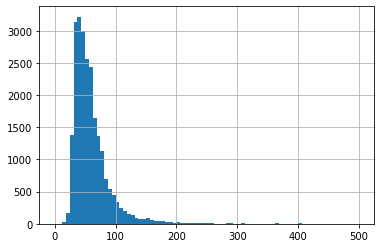

In [49]:
data['total_area'].hist(bins=80, range=(0,500))

Чаще всего в объявлениях о продаже встречаются квартиры площадью приблизительно 35-80 м2,
в среднем около 50 м2.

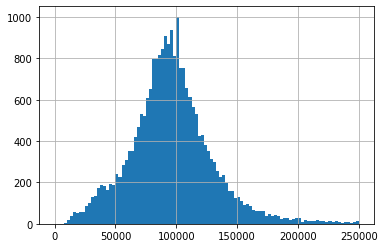

In [50]:
data['price_for_1m2'].hist(bins=100, range=(0,250000))

Цена за м2 в среднем около 80000-110000 руб.

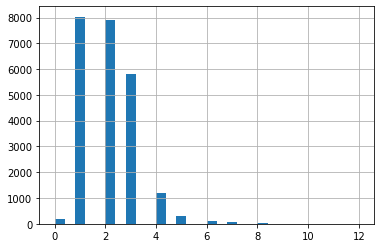

In [51]:
data['rooms'].hist(bins=30, range=(0, 12))

Чаще всего продают квартиры с 1-3 комнатами.

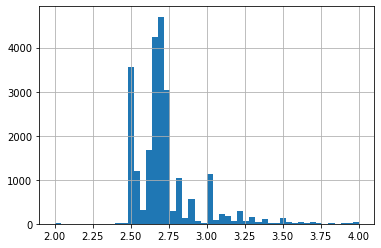

In [52]:
data['ceiling_height'].hist(bins=50, range=(2,4))

Высота потолков большинства квартир - 2.7 м.

**Изучим время продажи квартир**

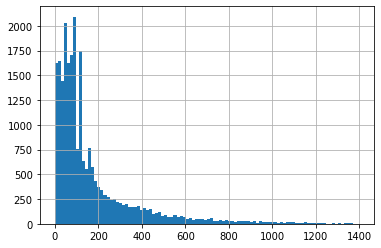

In [53]:
data['days_exposition'].hist(bins=100, range=(0,1400))

Продаются квартиры в основном в пределах 1-6 мес.

In [54]:
data['days_exposition'].mean()

170.35712773614463

In [55]:
data['days_exposition'].median()

92.0

***Вывод:***
Чаще всего квартиры продаются примерно за 3 месяца, что подтверждается и гистограммой и медианой.
Среднее кол-во дней за которое продается жилье почти в 2 раза превышает медиану из-за квартир, которые продается уже долгие годы(600-1400 дней).
Быстрой продажей квартиры можно считать продажу за 1-2 месяца, долгой - за более чем полгода. Необычайно долго
(более года), скорее всего продаются квартиры большой площади и по высокой цене. Также на долгую продажу может
влиять необычная планировка, которая мало кому подходит.

**Очистим таблицу от редких данных**

In [56]:
good_data=data.query('days_exposition <= 600 and 35 <= total_area <= 200 and 25000 <= price_for_1m2 <= 200000 and rooms<7 and 2.5 <= ceiling_height<3.5')

**Изучим какие факторы больше всего влияют на стоимость квартиры**

In [57]:
print(good_data['last_price'].corr(good_data['total_area']))

0.8074173223305542


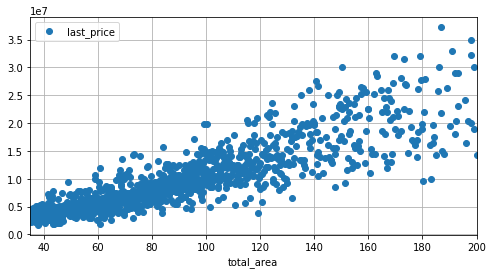

In [58]:
(
good_data.pivot_table(index='total_area', values='last_price', aggfunc='median')
             .plot(grid=True,style='o',figsize=(8,4))
)

Стоимость квартиры сильно зависит от площади, что вполне логично. На точечной диаграмме видно, что
больше всего предложений квартир с площадью до 120 м2. Для квартир с большей площадью идет большой разброс цен и зависимость цены от общей площади становится менее явной.

In [59]:
print(good_data['price_for_1m2'].corr(data['rooms']))

-0.09829347481640768


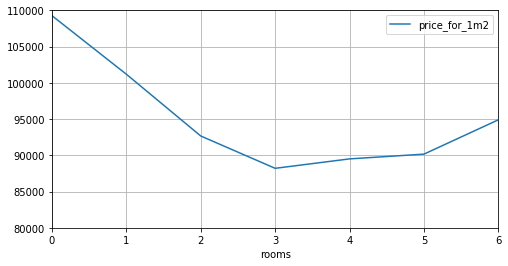

In [93]:
(
    good_data.pivot_table(index='rooms', values='price_for_1m2', aggfunc='median')
             .plot(xlim=(0,6), ylim=(80000,110000),grid=True,figsize=(8,4))
)

Зависимость цены за квадратный метр от кол-ва комнат слабая. Всё-таки при
ценообразовании учитываются и многие другие факторы. Из графика видим, что до трехкомнатных
квартир цена за м2 падает, а вот дальше держится примерно на одном уровне

In [61]:
print(good_data['price_for_1m2'].corr(good_data['citycenters_nearest']))

0.12714036406247192


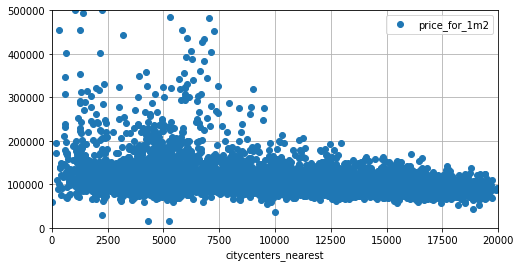

In [62]:
(
data.pivot_table(index='citycenters_nearest', values='price_for_1m2', aggfunc='median')
             .plot(grid=True, style='o',xlim=(0,20000),ylim=(0,500000),figsize=(8,4))
)

Зависимость цены за м2 от растояния до центра тоже небольшая.
По точечной диаграмме видно, что в пределах 10000 м от центра цены держатся примерно на одном уровне - 
около 70000-180000 руб за м2. Далее общий уровень цены немного снижается. При этом до 10000 м также встречаются выбросы - цены за м2 выше 200000 руб.

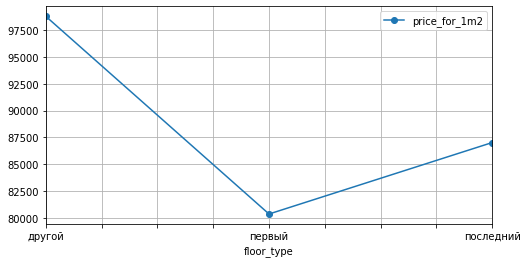

In [63]:
good_data.pivot_table(index='floor_type', values='price_for_1m2').plot(style='o-', grid=True,figsize=(8, 4))


Зависимость цены за м2 от этажа явная. Самые низкие цены за м2 в квартирах на 1 этаже, чуть больше
готовы предложить за квартиру на последнем этаже. Другие этаже ценятся больше.


In [64]:
good_data['year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


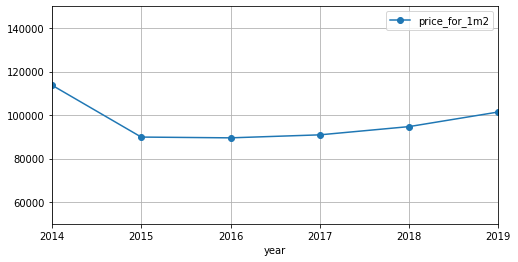

In [65]:
good_data.pivot_table(index='year', values='price_for_1m2', aggfunc='median').plot(ylim=(50000,150000),style='o-', grid=True,figsize=(8, 4))

Из графика видно, что в период с 2014 по 2015 год цены за м2 сильно упали. Затем с 2018 года вновь начали подниматься.

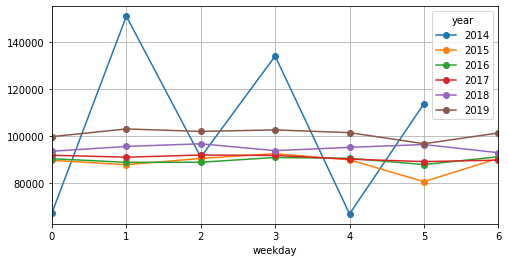

In [66]:
(
good_data.pivot_table(index='weekday',columns='year', values='price_for_1m2', aggfunc='median')
.plot(style='o-', grid=True,figsize=(8, 4))
)

Из графика видно, что цена не зависит от дня недели в который квартира выставлена на продажу.

**Выберем 10 населённых пунктов с наибольшим числом объявлений.
Посчитаем среднюю цену квадратного метра в этих населённых пунктах и 
выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья**

In [77]:
good_data['locality_name'].value_counts().head(10)

санкт-петербург      12209
посёлок шушары         359
всеволожск             342
посёлок мурино         338
пушкин                 282
посёлок парголово      282
колпино                268
гатчина                246
деревня кудрово        203
выборг                 174
Name: locality_name, dtype: int64

In [78]:

ten_locality = ['санкт-петербург','посёлок мурино','посёлок шушары','всеволожск','пушкин','колпино','посёлок парголово', 'гатчина' ,'деревня кудрово', 'выборг']


In [79]:
(
good_data.query('locality_name in @ten_locality')
.pivot_table(index='locality_name', values='price_for_1m2')
)

,price_for_1m2
locality_name,
всеволожск,66981.406433
выборг,57779.367816
гатчина,68818.032520
деревня кудрово,90574.842365
колпино,72685.973881
посёлок мурино,82558.547337
посёлок парголово,89664.166667
посёлок шушары,76422.710306
пушкин,102061.166667


***Вывод:***
Самая высокая стоимость жилья в Санкт-Петербурге и Пушкине.
Самая низкая стоимость жилья в Выборге, Гатчине и Всеволожске.
Скорее всего низкая стоимость обусловлена удаленностью от Санкт-Петербурга
и низкой транспортной доступностью.

**Изучим предложения квартир в Санкт-Петербурге**

In [80]:
good_data_spb=good_data.query('locality_name=="санкт-петербург"')
display(good_data_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,floor_type,living/total,kitchen/total,weekday,year
0,20,13000000,108.0,2019-03-07,3,2.700000,16,51.0,8,0,...,482,2,755,114,120370,другой,0.472222,0.231481,3,2019
2,10,5196000,56.0,2015-08-20,2,2.697174,5,34.3,4,0,...,90,2,574,558,92785,другой,0.612500,0.148214,3,2015
4,2,10000000,100.0,2018-06-19,2,3.030000,14,32.0,13,0,...,112,1,48,121,100000,другой,0.320000,0.410000,1,2018
7,5,7915000,71.6,2019-04-18,2,2.697174,24,30.5,22,0,...,-1,0,-1,91,110544,другой,0.425978,0.263966,3,2019
9,18,5400000,61.0,2017-02-26,3,2.500000,9,43.6,7,0,...,-1,0,-1,289,88524,другой,0.714754,0.106557,6,2017


In [81]:
good_data_spb['km']=good_data_spb['citycenters_nearest'].apply(lambda x: x/1000)
good_data_spb['km']=good_data_spb['km'].astype('int')
display(good_data_spb.head())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,floor_type,living/total,kitchen/total,weekday,year,km
0,20,13000000,108.0,2019-03-07,3,2.700000,16,51.0,8,0,...,2,755,114,120370,другой,0.472222,0.231481,3,2019,16
2,10,5196000,56.0,2015-08-20,2,2.697174,5,34.3,4,0,...,2,574,558,92785,другой,0.612500,0.148214,3,2015,13
4,2,10000000,100.0,2018-06-19,2,3.030000,14,32.0,13,0,...,1,48,121,100000,другой,0.320000,0.410000,1,2018,8
7,5,7915000,71.6,2019-04-18,2,2.697174,24,30.5,22,0,...,0,-1,91,110544,другой,0.425978,0.263966,3,2019,11
9,18,5400000,61.0,2017-02-26,3,2.500000,9,43.6,7,0,...,0,-1,289,88524,другой,0.714754,0.106557,6,2017,15


In [82]:
mean_price=good_data_spb.groupby('km')['price_for_1m2'].mean().astype('int')


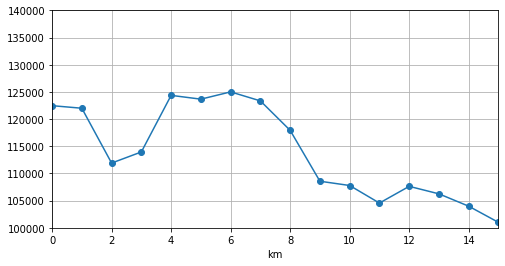

In [83]:
mean_price.plot(x='km', y='price_for_1m2', style='o-',xlim=(0,15),ylim=(100000, 140000),grid=True,figsize=(8, 4)  )

Центральной зоной в Санкт-Петербурге будем считать зону в пределах 3 км от центра.

**Выделим сегмент квартир в центре**

In [84]:
good_data_center=good_data_spb.query('km <= 3')

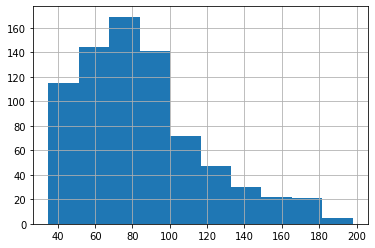

In [85]:
good_data_center['total_area'].hist()

В центре площадь квартир, выставленных на продажу, чаще всего около 70-80 м2.

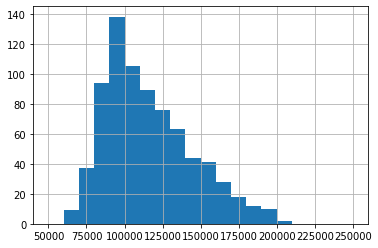

In [86]:
good_data_center['price_for_1m2'].hist(bins=20,range=(50000, 250000))

Цена за м2 в среднем около 90000-110000 руб.

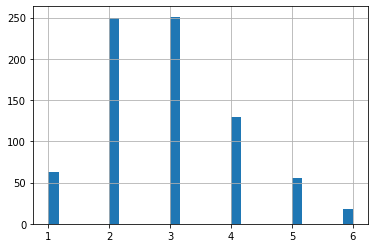

In [87]:
good_data_center['rooms'].hist(bins=30)

Что касается количества комнат, то тут явно бросается в глаза, что 4-х комнатные квартиры встречаются чаще, 
чем однокомнатные. Лидерами являются квартиры с двумя и тремя комнатами.

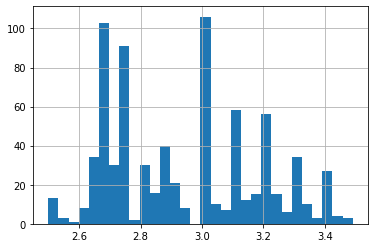

In [88]:
good_data_center['ceiling_height'].hist(bins=30)


Высота потолков в историческом центре, конечно же, в среднем выше, чем просто по городу:
помимо множества квартир с высотой потолков 2.7-2.8 м, часто встречаются так же и потолки
по 3, 3.1, 3.2 и даже 3.4 м.

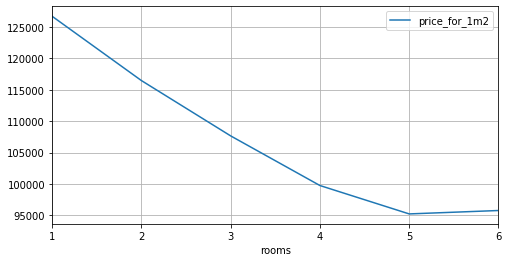

In [89]:
(
    good_data_center.pivot_table(index='rooms', values='price_for_1m2', aggfunc='median')
             .plot(grid=True,figsize=(8,4))
)

Также как и в общем по городу и области, в центре четко прослеживается обратная зависимость цены за м2 от
количества комнат:дороже всего обойдется квартира с 1 или 2 комнатами, 1 м2 в 6-ти комнатной квартире обойдется
почти в полтора раза дешевле.

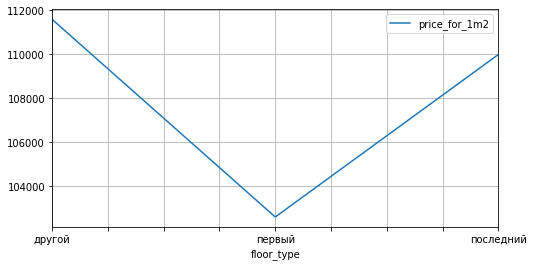

In [90]:
(
    good_data_center.pivot_table(index='floor_type', values='price_for_1m2', aggfunc='median')
             .plot(grid=True,figsize=(8,4))
)

Также как и в целом по городу и области, в центре Спб меньше всего ценится первый этаж. Хотя здесь 
уже не такая большая разница в цене между последним и любым другим этажом.


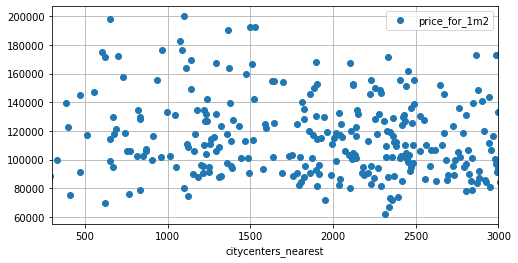

In [91]:
(
    good_data_center.pivot_table(index='citycenters_nearest', values='price_for_1m2', aggfunc='median')
             .plot(grid=True,style='o',xlim=(300,3000),figsize=(8,4))
)

В центре цена практически не зависит от удаленности, что вполне логично. Мы и так оставили данные только
по центральной части города. Дорогие квартиры могут быть как в 1 км, так и в 3 км от самого центра.

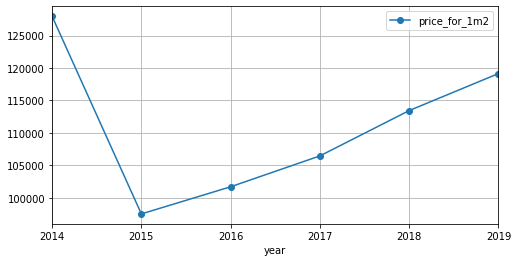

In [92]:
(
    good_data_center.pivot_table(index='year', values='price_for_1m2', aggfunc='median')
             .plot(grid=True,style='o-',figsize=(8,4))
)

На графике видно, что также как и в целом по городу, в центре упали цены в период с 2014 по 2015 год. Однако с 2016 года цены начали подниматься и к 2019 году практически достигли того же уровня, что был 
в 2014 году.

## Общий вывод

***Мы провели исследование объявлений о продаже квартир по Санкт-Петербургу и Лен. области, и отдельно по центру
Cанкт-Петербурга. Основные выводы, которые мы сделали, изучив представленные данные:***
   
   * Абсолютно везде стоимость жилья сильно зависит от этажа. Дешевле всего будут квартиры на 1 этаже.
   * Количество комнат также сильно влияет на стоимость. Чем больше комнат, тем дешевле обойдется 1 м2.
   * Расстояние до центра города не всегда влияет на стоимость, что подтверждается графиками.Хотя в
      целом, при отдалении от центра, цена постепенно снижается.
   * Для квартир в центральной зоне (в пределах 3 км) расстояние от самого центра вообще не имеет 
      значения.
   * Цена за м2 от площади мало зависит,т.к. часто небольшая квартира в хорошем районе и престижном           доме может стоить больше, чем большая квартира в неудачном районе и старом доме без капитального         ремонта.
   * В период с 2014 по 2015 год цены на квартиры сильно снизились. Однако, если в целом по городу и          области рост цен потом был довольно плавный, то в центре Петербурга цены с 2015 года поднялись          довольно резко и практически достигли уровня цен 2014 года.
   * В среднем стоимость квартиры по Санкт-Петербургу и ЛО - 4950000 руб, цена за м2 - 93421 руб,
     площадь - 55 м2.
   * В центре Санкт-Петербурга чаще всего встречаются квартиры стоимостью 8584500 руб, цена за м2 -
     109970 руб, площадь - 79 м2.
   
  